# Bitcoin Google Trends Script

In [1]:
import numpy as np 
import pandas as pd
import pandas_datareader.data as web
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

# # connecting to google 
from pytrends.request import TrendReq
pytrend = TrendReq()

In [10]:
# Import Data From Google Trends
kw_list = ["crypto"]
pytrend.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
crypto_query = pytrend.interest_over_time()
crypto_query.tail() # weekly data 

,crypto,isPartial
date,,
2021-02-07,100,False
2021-02-14,96,False
2021-02-21,86,False
2021-02-28,67,False
2021-03-07,72,True


Text(0.5, 1.0, "Google search query for 'crypto' since 2016")

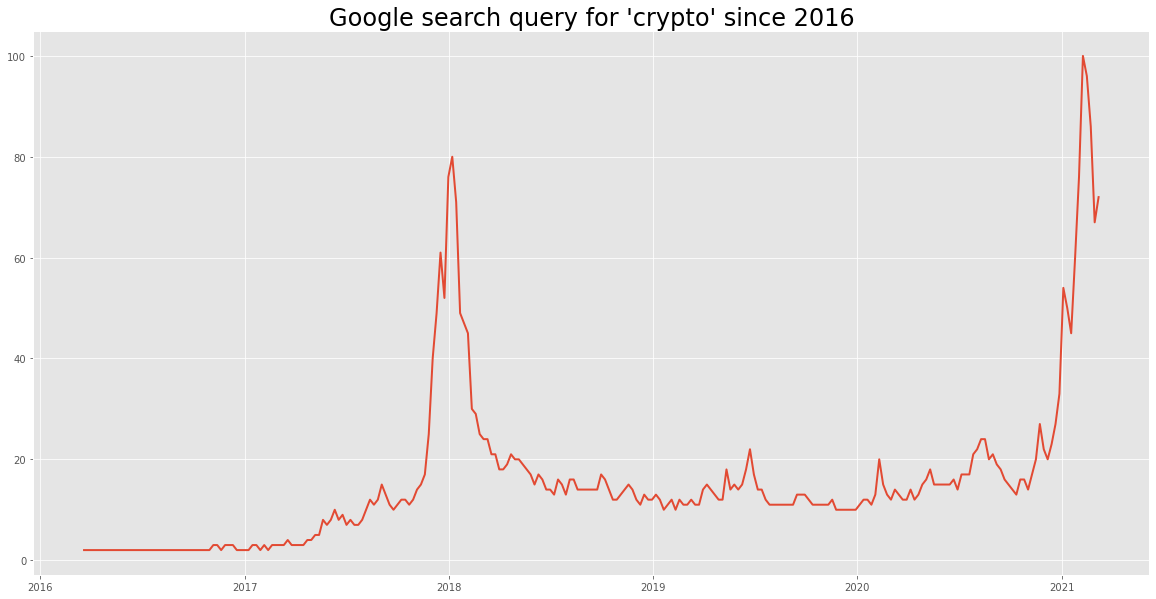

In [11]:
f, ax = plt.subplots(figsize=(20,10))

ax.plot(crypto_query['crypto'], lw=2)
ax.set_title("Google search query for 'crypto' since 2016", fontsize=24)

In [14]:
# Import Data From Google Trends
kw_list = ["bitcoin"]
pytrend.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
bitcoin_query = pytrend.interest_over_time()
bitcoin_query.tail() # weekly data 

,bitcoin,isPartial
date,,
2021-02-07,60,False
2021-02-14,58,False
2021-02-21,65,False
2021-02-28,44,False
2021-03-07,42,True


Text(0.5, 1.0, "Google search query for 'bitcoin' since 2016")

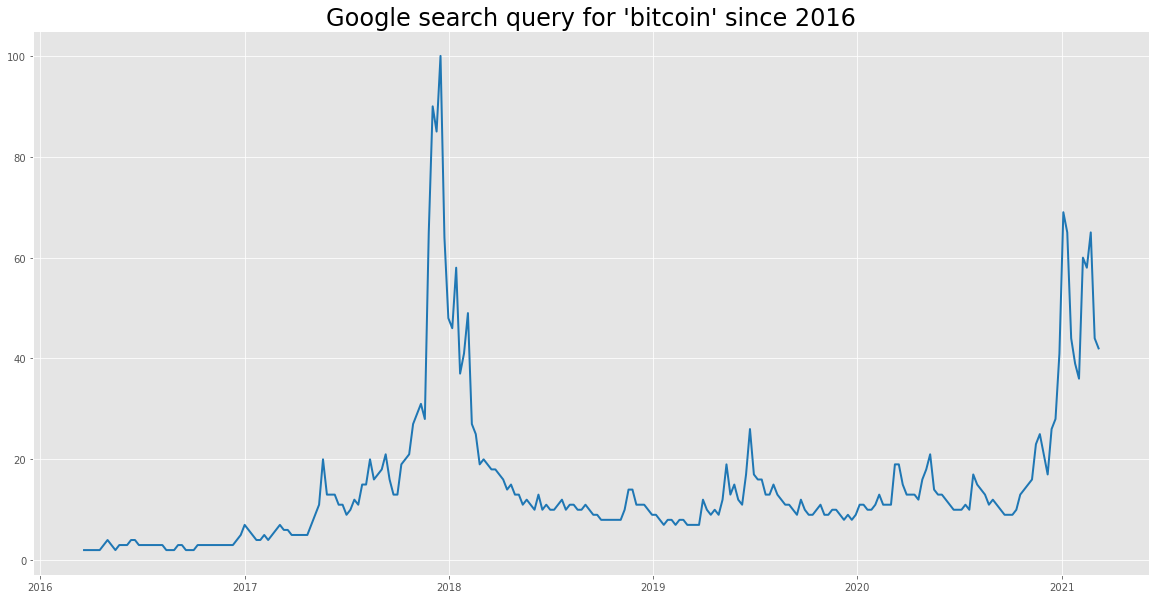

In [17]:
f, ax = plt.subplots(figsize=(20,10))

ax.plot(bitcoin_query['bitcoin'], lw=2, color='tab:blue')
ax.set_title("Google search query for 'bitcoin' since 2016", fontsize=24)

In [16]:
# Import Data From Google Trends
kw_list = ["ethereum"]
pytrend.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
ether_query = pytrend.interest_over_time()
ether_query.tail() # weekly data 

,ethereum,isPartial
date,,
2021-02-07,87,False
2021-02-14,83,False
2021-02-21,83,False
2021-02-28,58,False
2021-03-07,60,True


Text(0.5, 1.0, "Google search query for 'ethereum' since 2016")

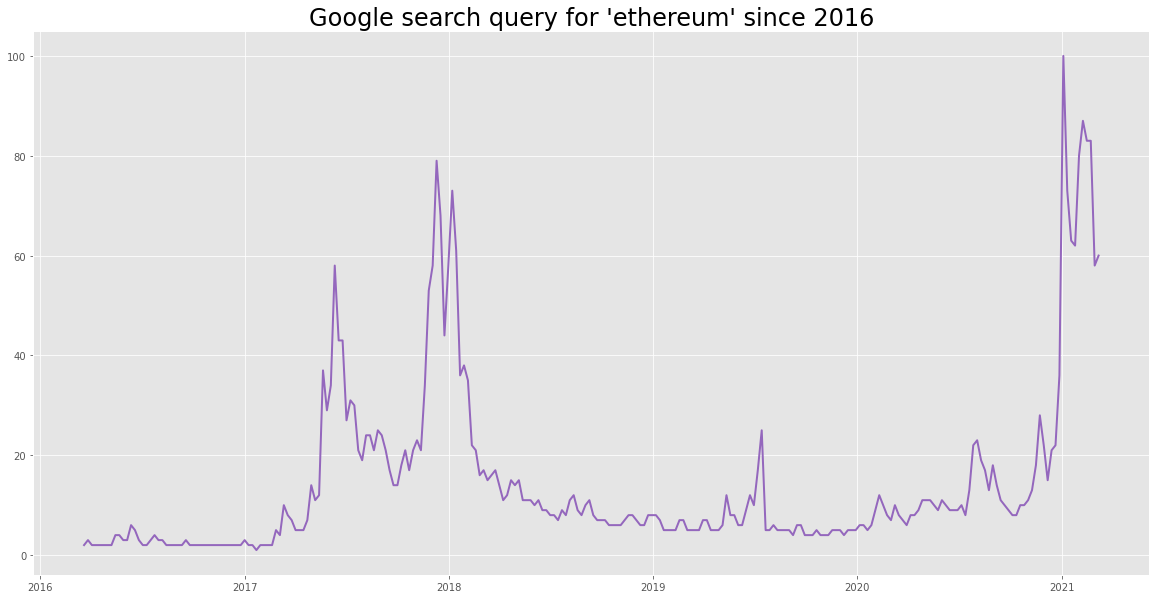

In [21]:
f, ax = plt.subplots(figsize=(20,10))

ax.plot(ether_query['ethereum'], lw=2, color='tab:purple')
ax.set_title("Google search query for 'ethereum' since 2016", fontsize=24)

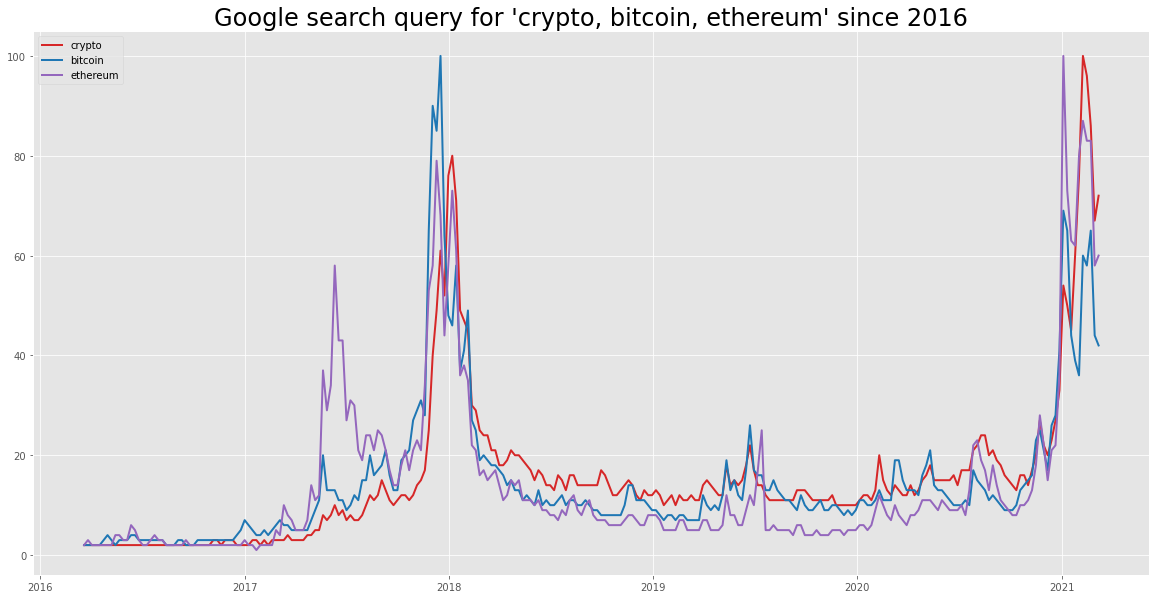

In [24]:
f, ax = plt.subplots(figsize=(20,10))

ax.plot(crypto_query['crypto'], lw=2, color ='tab:red', label='crypto')
ax.plot(bitcoin_query['bitcoin'], lw=2, color='tab:blue', label='bitcoin')
ax.plot(ether_query['ethereum'], lw=2, color='tab:purple', label='ethereum')
ax.set_title("Google search query for 'crypto, bitcoin, ethereum' since 2016", fontsize=24)
ax.legend(loc='best')

In [29]:
combined = pd.merge(crypto_query['crypto'], bitcoin_query['bitcoin'], on=crypto_query.index, how='outer')

In [31]:
combined = combined.set_index('key_0')

In [32]:
combined = pd.merge(combined, ether_query['ethereum'], on=crypto_query.index, how='outer')

In [34]:
combined = combined.set_index('key_0')

In [39]:
corr = combined.corr()
corr.style.background_gradient(cmap='RdBu_r').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,crypto,bitcoin,ethereum
crypto,1.00,0.83,0.85
bitcoin,0.83,1.00,0.87
ethereum,0.85,0.87,1.00


In [49]:
print(combined.head())
print(combined.tail())

            crypto  bitcoin  ethereum
key_0                                
2016-03-20       2        2         2
2016-03-27       2        2         3
2016-04-03       2        2         2
2016-04-10       2        2         2
2016-04-17       2        2         2
            crypto  bitcoin  ethereum
key_0                                
2021-02-07     100       60        87
2021-02-14      96       58        83
2021-02-21      86       65        83
2021-02-28      67       44        58
2021-03-07      72       42        60


In [54]:
#import hist. btc data
btc = web.DataReader('BTC-USD', data_source = 'yahoo', start='2016-03-10')
btc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-03-10,417.511993,413.251007,414.743988,417.131012,81022896.0,417.131012
2016-03-11,423.925995,417.013000,417.238007,421.690002,73969696.0,421.690002
2016-03-12,421.795013,410.093994,421.605011,411.623993,92712896.0,411.623993
2016-03-13,416.604004,411.641998,411.648010,414.065002,74322800.0,414.065002
2016-03-14,416.683990,414.200989,414.200989,416.437988,95259400.0,416.437988


In [47]:
#import hist. btc data
eth = web.DataReader('ETH-USD', data_source = 'yahoo', start='2016-03-10')
eth.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-03-10,12.2393,10.9911,11.8815,11.3050,26851500.0,11.3050
2016-03-11,11.5999,10.3937,11.2216,11.0828,21002700.0,11.0828
2016-03-12,13.5333,11.0877,11.1307,13.5333,48957300.0,13.5333
2016-03-13,15.2571,13.4674,13.5102,14.4750,43915100.0,14.4750
2016-03-14,15.0130,11.5821,14.5122,12.4526,58385100.0,12.4526


In [55]:
btc_weekly = btc['Close'].resample('W').mean()
btc_weekly

Date
2016-03-13      416.127502
2016-03-20      414.949568
2016-03-27      418.993626
2016-04-03      418.463139
2016-04-10      421.999285
                  ...     
2021-02-14    46976.106027
2021-02-21    52928.761719
2021-02-28    48213.844866
2021-03-07    49450.859933
2021-03-14    57096.114955
Freq: W-SUN, Name: Close, Length: 262, dtype: float64

In [56]:
btc_weekly = btc_weekly[:-1] #drop last row to match with google trends df

In [57]:
btc_weekly = btc_weekly[1:] #drop first row to match with google trends df

In [58]:
eth_weekly = eth['Close'].resample('W').mean()
eth_weekly

Date
2016-03-13      12.599025
2016-03-20      11.559086
2016-03-27      11.324075
2016-04-03      11.578700
2016-04-10       9.663363
                 ...     
2021-02-14    1786.488543
2021-02-21    1880.295131
2021-02-28    1539.504586
2021-03-07    1583.750610
2021-03-14    1842.835693
Freq: W-SUN, Name: Close, Length: 262, dtype: float64

In [59]:
eth_weekly = eth_weekly[:-1] #drop last row to match with google trends df

In [60]:
eth_weekly = eth_weekly[1:] #drop first row to match with google trends df

In [62]:
btc_weekly = pd.DataFrame(btc_weekly) #create df 
btc_weekly.tail()

,Close
Date,
2021-02-07,37108.483259
2021-02-14,46976.106027
2021-02-21,52928.761719
2021-02-28,48213.844866
2021-03-07,49450.859933


In [63]:
eth_weekly = pd.DataFrame(eth_weekly) #create df 
eth_weekly.tail()

,Close
Date,
2021-02-07,1592.947423
2021-02-14,1786.488543
2021-02-21,1880.295131
2021-02-28,1539.504586
2021-03-07,1583.750610


In [64]:
btc_weekly = btc_weekly.join(bitcoin_query['bitcoin'], how="inner")
btc_weekly

,Close,bitcoin
Date,,
2016-03-20,414.949568,2
2016-03-27,418.993626,2
2016-04-03,418.463139,2
2016-04-10,421.999285,2
2016-04-17,427.068717,2
...,...,...
2021-02-07,37108.483259,60
2021-02-14,46976.106027,58
2021-02-21,52928.761719,65


In [66]:
eth_weekly = eth_weekly.join(ether_query['ethereum'], how="inner")
eth_weekly

,Close,ethereum
Date,,
2016-03-20,11.559086,2
2016-03-27,11.324075,3
2016-04-03,11.578700,2
2016-04-10,9.663363,2
2016-04-17,8.438764,2
...,...,...
2021-02-07,1592.947423,87
2021-02-14,1786.488543,83
2021-02-21,1880.295131,83


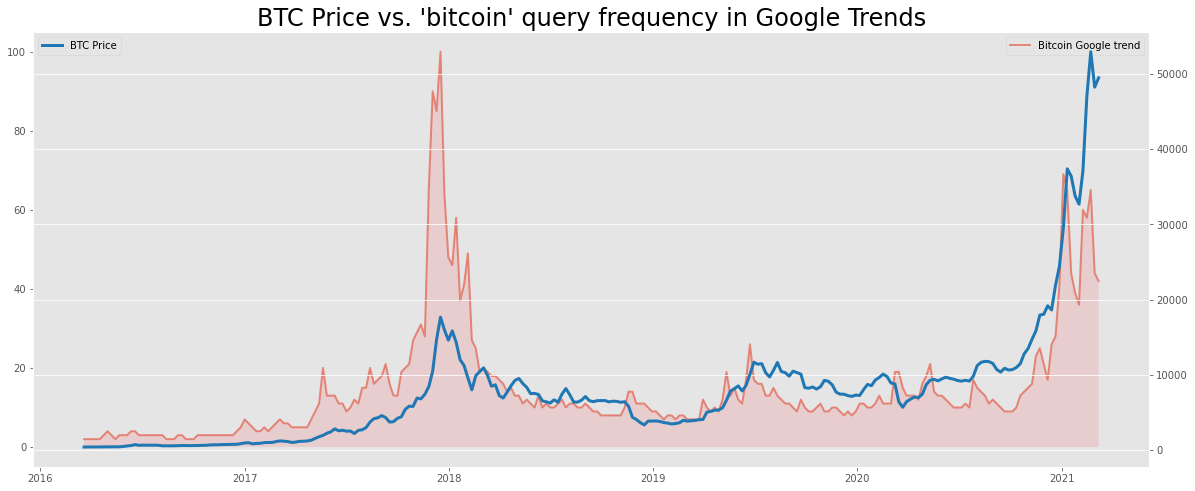

In [87]:
f, ax = plt.subplots(figsize=(20,8))

ax.plot(btc_weekly['bitcoin'], alpha=0.6, lw =2, label = 'Bitcoin Google trend')
ax.fill_between(btc_weekly.index, btc_weekly['bitcoin'],  facecolor ='red', alpha = 0.1) 
ax.grid(False)
ax.legend()
ax = ax.twinx()
ax.plot(btc_weekly['Close'], color = 'tab:blue', lw=3, label = 'BTC Price')

ax.set_title("BTC Price vs. 'bitcoin' query frequency in Google Trends", fontsize=24)
ax.legend()
plt.show()

In [69]:
btc_weekly.corr()

,Close,bitcoin
Close,1.000000,0.684113
bitcoin,0.684113,1.000000


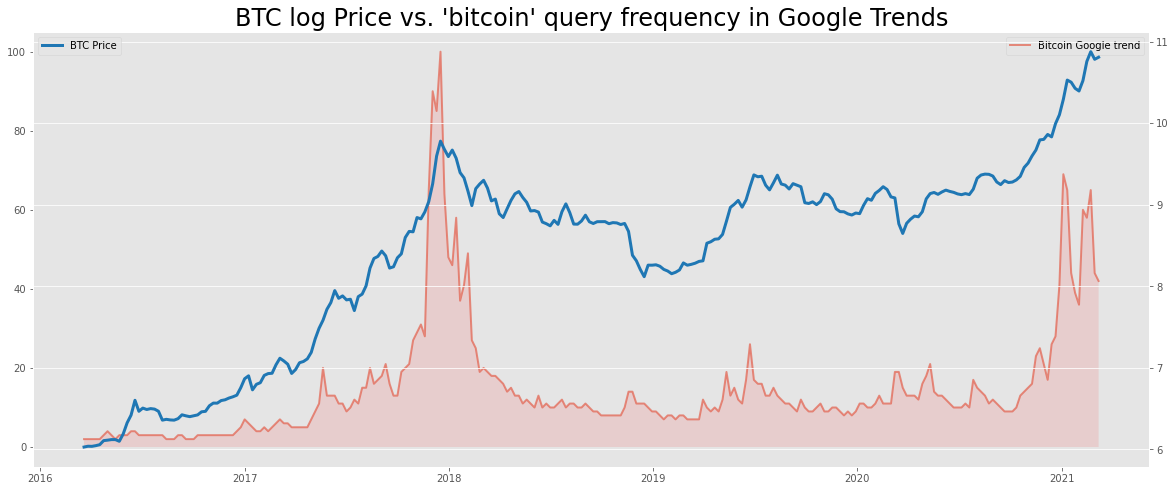

In [88]:
f, ax = plt.subplots(figsize=(20,8))

ax.plot(btc_weekly['bitcoin'], alpha=0.6, lw =2, label = 'Bitcoin Google trend')
ax.fill_between(btc_weekly.index, btc_weekly['bitcoin'],  facecolor ='red', alpha = 0.1) 
ax.grid(False)
ax.legend()
ax = ax.twinx()
ax.plot(btc_weekly['Close'].apply(np.log), color = 'tab:blue', lw=3, label = 'BTC Price')

ax.set_title("BTC log Price vs. 'bitcoin' query frequency in Google Trends", fontsize=24)
ax.legend()
plt.show()

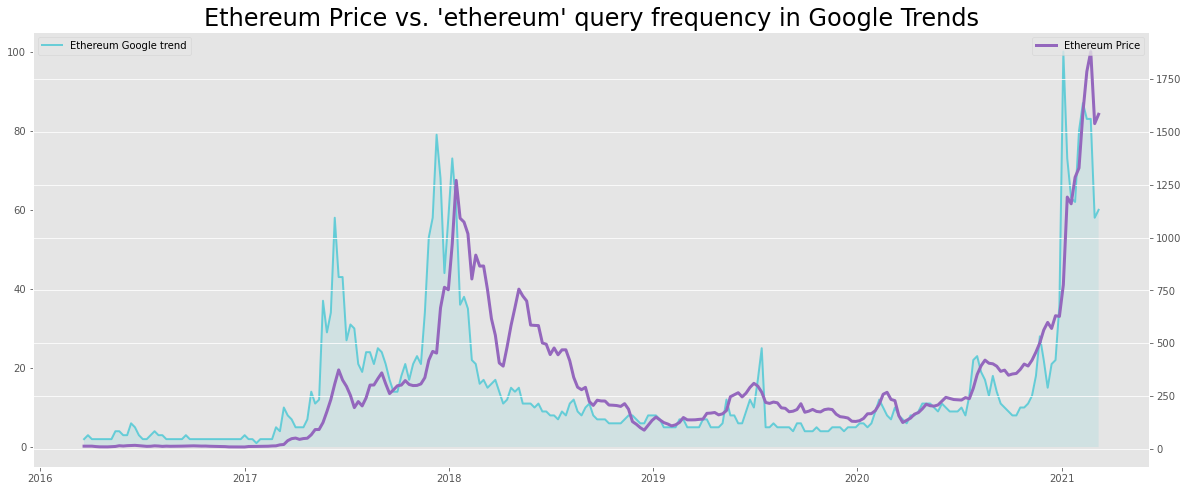

In [84]:
f, ax = plt.subplots(figsize=(20,8))

ax.plot(eth_weekly['ethereum'], alpha=0.6, lw =2, label = 'Ethereum Google trend', color = 'tab:cyan')
ax.fill_between(eth_weekly.index, eth_weekly['ethereum'],  facecolor ='tab:cyan', alpha = 0.1) 
ax.grid(False)
ax.legend(loc='upper left')
ax = ax.twinx()
ax.plot(eth_weekly['Close'], color = 'tab:purple', lw=3, label = 'Ethereum Price')

ax.set_title("Ethereum Price vs. 'ethereum' query frequency in Google Trends", fontsize=24)
ax.legend(loc='upper right')
plt.show()

In [77]:
eth_weekly.corr() #closer correlation than bitcoin 

,Close,ethereum
Close,1.00000,0.78508
ethereum,0.78508,1.00000


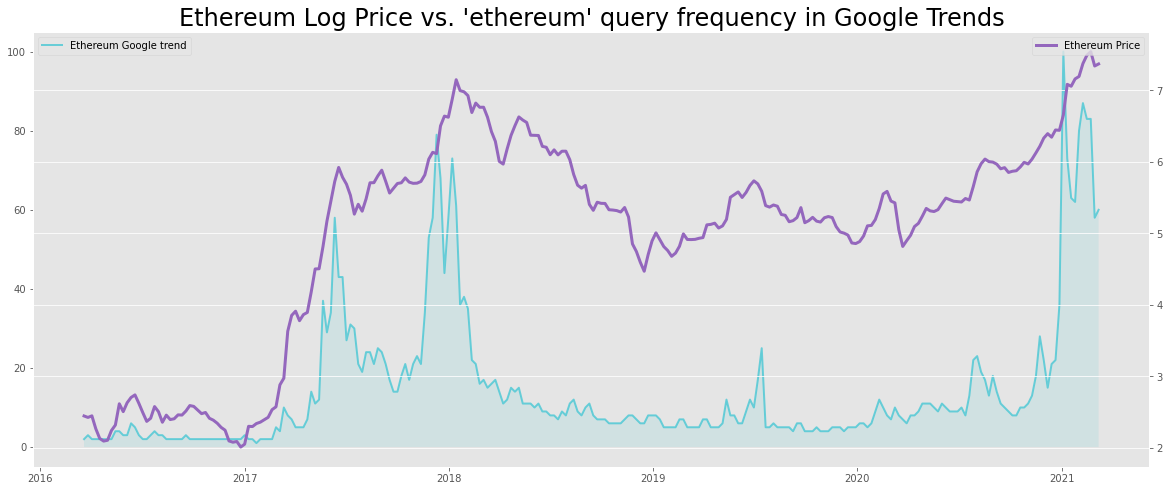

In [86]:
f, ax = plt.subplots(figsize=(20,8))

ax.plot(eth_weekly['ethereum'], alpha=0.6, lw =2, label = 'Ethereum Google trend', color = 'tab:cyan')
ax.fill_between(eth_weekly.index, eth_weekly['ethereum'],  facecolor ='tab:cyan', alpha = 0.1) 
ax.grid(False)
ax.legend(loc='upper left')
ax = ax.twinx()
ax.plot(eth_weekly['Close'].apply(np.log), color = 'tab:purple', lw=3, label = 'Ethereum Price')

ax.set_title("Ethereum Log Price vs. 'ethereum' query frequency in Google Trends", fontsize=24)
ax.legend(loc='upper right')
plt.show()